<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/train_DSPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE PROJECT/traincsv.csv')

<ipython-input-2-08bf24ffe0d8>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE PROJECT/traincsv.csv')


In [3]:
#checking the data types of each column

train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,object
fresh_sales,object
dry_sales,object
cluster_catgeory,object


In [4]:
train_data.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [5]:
#Steps before correcting the format of luxury_sales column.

In [6]:
# Here we took out everything which are not numeric in luxury_sales column.

problematic_rows = train_data[~train_data["luxury_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["luxury_sales"]].drop_duplicates())  # Show unique problematic values


                               luxury_sales
4234                                    NaN
80043     One thousand four hundread ruppes
175278                                  nul
297911               Eight hundread ruppess
326593              six hundread and hirty 
497177               Thousand tow hundread 
497245      seven hundread and nine ruppees
558562  Three thousand two hundread ruppess
753131   Four thousand one hundread ruppess


In [7]:
#Then we replaced them with their respective numerical values

In [8]:
#80043     One thousand four hundread ruppes
train_data.loc[80043,"luxury_sales"] = 1400

#297911               Eight hundread ruppess
train_data.loc[297911,"luxury_sales"] = 800

#326593              six hundread and hirty
train_data.loc[326593,"luxury_sales"] = 630

#497177               Thousand tow hundread
train_data.loc[497177,"luxury_sales"] = 1200

#497245      seven hundread and nine ruppees
train_data.loc[497245,"luxury_sales"] = 709

#558562  Three thousand two hundread ruppess
train_data.loc[558562,"luxury_sales"] = 3002

#753131   Four thousand one hundread ruppess
train_data.loc[753131,"luxury_sales"] = 4100



In [9]:
#checking whether they got replaced properly

cleaned_problematic_values = [80043,297911,326593,497177,497245,558562,753131]
train_data.loc[cleaned_problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
80043,10774052.0,Kelaniya,1400,1118.0,5934.0,4
297911,10189925.0,Kelaniya,800,4003.84,1059.84,2
326593,10467590.0,Nuwara Eliya,630,3420.3,894.54,2
497177,10537755.0,Kandy,1200,2041.0,6939.4,1
497245,10468127.0,Kandy,709,1032.48,4194.45,1
558562,10076064.0,Trincomalee,3002,10416.9,1923.12,6.0
753131,10695296.0,Batticaloa,4100,4286.72,4034.56,3


In [10]:
#Replacing NULL values to the correct fromat and conveting the column data type

train_data["luxury_sales"] = train_data["luxury_sales"].replace(["nul", "NULL"], pd.NA).astype("Float64")

In [11]:
#findings:
    #Before there were 35 NUlL values and now there is 38, so means it worked

In [12]:
train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,Float64
fresh_sales,object
dry_sales,object
cluster_catgeory,object


In [13]:
#Steps before correcting the format of fresh_sales column.

In [14]:
problematic_rows = train_data[~train_data["fresh_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["fresh_sales"]].drop_duplicates())  # Show unique problematic values


                                fresh_sales
4326                                    NaN
161810         Six hundread and five ruppes
174714                                  nul
326334     Three thousana and five hundread
558897             thirteen thousand ruppes
752816                 Five thousand ruppes
753256  Two thousand seven hundread ruppess


In [15]:
#161810         Six hundread and five ruppes
train_data.loc[161810,"fresh_sales"] = 605

#326334     Three thousana and five hundread
train_data.loc[326334,"fresh_sales"] = 3500

#558897             thirteen thousand ruppes
train_data.loc[558897,"fresh_sales"] = 13000

#752816                 Five thousand ruppes
train_data.loc[752816,"fresh_sales"] = 5000

#753256  Two thousand seven hundread ruppess
train_data.loc[753256,"fresh_sales"] = 2700


In [16]:
#checking whether they got replaced properly

cleaned_problematic_values = [161810,326334,558897,752816,753256]
train_data.loc[cleaned_problematic_values]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
161810,10261075.0,Panadura,887.36,605,3604.9,4
326334,10006007.0,Kaduwela,758.52,3500,1029.42,2
558897,10314616.0,Batticaloa,3027.36,13000,2081.31,6.0
752816,10369123.0,Trincomalee,5501.57,5000,5679.04,3
753256,10369199.0,Colombo,2692.8,2700,2861.1,1


In [17]:
#Replacing NULL values to the correct fromat and conveting the column data type

train_data["fresh_sales"] = train_data["fresh_sales"].replace(["nul", "NULL"], pd.NA).astype("Float64")

In [18]:
#Steps before correcting the format of dry_sales column.

In [19]:
problematic_rows = train_data[~train_data["dry_sales"].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(problematic_rows[["dry_sales"]].drop_duplicates())  # Show unique problematic values


                                    dry_sales
4929                                      NaN
148029  Four thousand and two hundread ruppes
174631                                    nul


In [20]:
#148029   Four thousand and two hundread ruppes
train_data.loc[148029,"dry_sales"] = 4200

In [21]:
#checking whether they got replaced properly

train_data.loc[[148029]]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
148029,10190107.0,Dehiwala-Mount Lavinia,931.5,931.5,4200,4


In [22]:
#Replacing NULL values to the correct fromat and conveting the column data type

train_data["dry_sales"] = train_data["dry_sales"].replace(["nul", "NULL"], pd.NA).astype("Float64")

In [23]:
#checking the data types at the end

train_data.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,Float64
fresh_sales,Float64
dry_sales,Float64
cluster_catgeory,object


In [24]:
#Number of duplicates

In [25]:
print(f'Number of fully duplicated rows: {train_data.duplicated().sum()}')  # Count of fully duplicated rows
print(f'Number of duplicated customer IDs:{(train_data["Customer_ID"].duplicated().sum())}')  # Count of duplicate customer IDs


Number of fully duplicated rows: 0
Number of duplicated customer IDs:1


In [26]:
#Taking summary statistics

In [27]:
print(train_data.describe())

        Customer_ID  luxury_sales  fresh_sales    dry_sales
count  7.741530e+05      774117.0     774110.0     774118.0
mean   1.038708e+07   1921.963172  4428.683485  4676.279783
std    2.234795e+05   1004.081116  3334.661775  3409.384574
min    1.000000e+07         500.0        500.0        500.0
25%    1.019354e+07       1213.52      1620.19      1787.94
50%    1.038708e+07       1715.28      3356.51      3727.76
75%    1.058062e+07        2338.7      6671.61       7162.2
max    1.077415e+07       6999.65      13997.9      13999.3


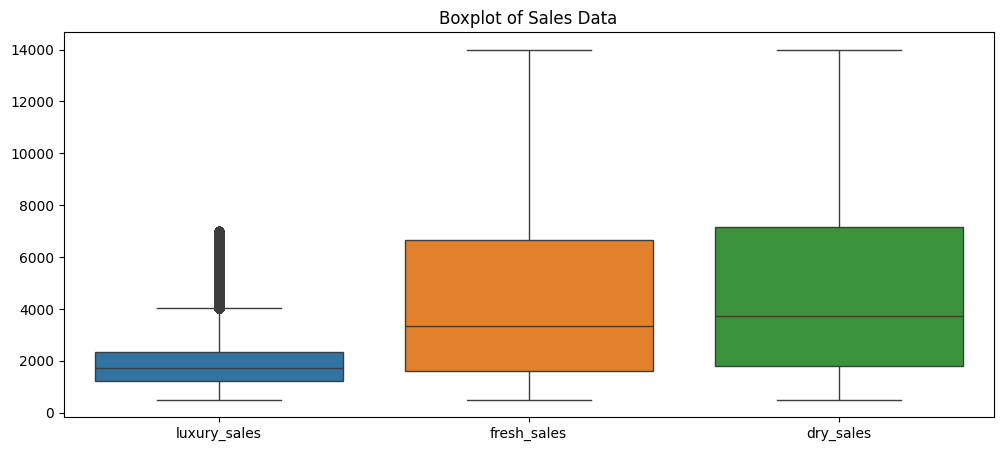

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.boxplot(data=train_data[["luxury_sales", "fresh_sales", "dry_sales"]])
plt.title("Boxplot of Sales Data")
plt.show()


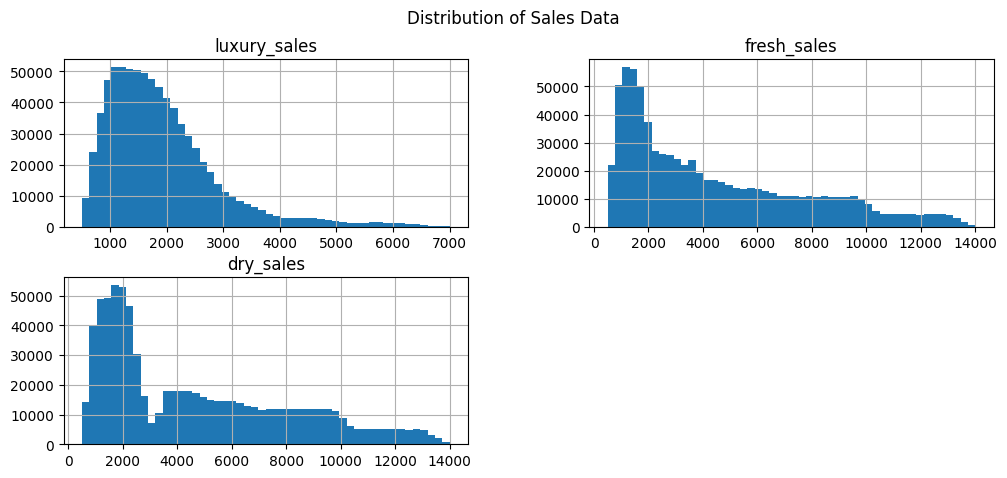

In [29]:
#checking the distribution of sales daata

train_data[["luxury_sales", "fresh_sales", "dry_sales"]].hist(bins=50, figsize=(12, 5))
plt.suptitle("Distribution of Sales Data")
plt.show()
